## Customer Segmentation

In [900]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [901]:
df=pd.read_csv("bank.csv")

In [902]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [903]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#### No apparent null value

In [904]:
for feature in df.columns:
    display(df[feature].value_counts())

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

no     10994
yes      168
Name: default, dtype: int64

 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: balance, Length: 3805, dtype: int64

no     5881
yes    5281
Name: housing, dtype: int64

no     9702
yes    1460
Name: loan, dtype: int64

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

97      39
161     38
158     37
119     37
150     37
        ..
915      1
2029     1
1499     1
1399     1
1812     1
Name: duration, Length: 1428, dtype: int64

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
20       5
19       5
24       5
22       4
30       4
23       3
25       3
26       3
32       2
43       2
29       2
33       1
28       1
41       1
27       1
63       1
31       1
Name: campaign, dtype: int64

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
17      11
14       6
15       5
19       4
16       2
20       2
27       2
23       2
40       1
41       1
28       1
18       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: previous, dtype: int64

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

no     5873
yes    5289
Name: deposit, dtype: int64

In [905]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


### Balance has negative values along with Pday

In [906]:
df.select_dtypes("object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [907]:
df.default.value_counts(normalize=True)

no     0.984949
yes    0.015051
Name: default, dtype: float64

- ##### 98.5 percent of default column is no, meaning that the model will not lose any use information if we removed this feature.

In [908]:
df.drop(columns="default",axis=1,inplace=True)

##### We will remove day month and duration as they are not significant for our purposes

In [909]:
df.drop(columns=["day",'month','duration'],axis=1,inplace=True)

## EDA

In [910]:
import sys
import os

# Get the current directory of your script
current_dir = os.getcwd()

# Construct the path to the library folder
library_path = os.path.join(current_dir, 'D:\python projects\Machine Learning Projects\Viz')

# Add the library path to sys.path
sys.path.append(library_path)

# Now you can import the library
import Tommy
plt.style.use(r'D:\python projects\Machine Learning Projects\Viz\Tommy\data\tommy.mplstyle')


### Correlation using Pearson

<AxesSubplot:>

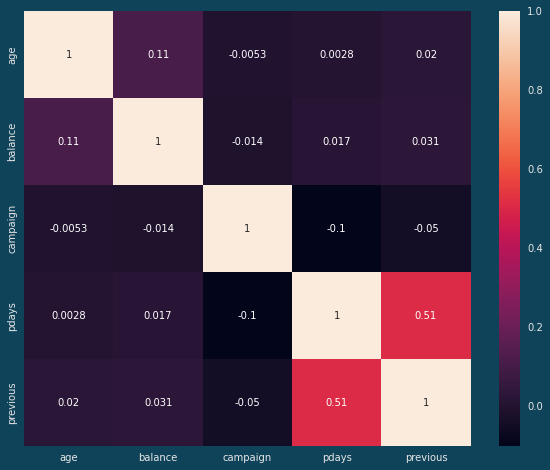

In [911]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

### Correlation using Spearman

<AxesSubplot:>

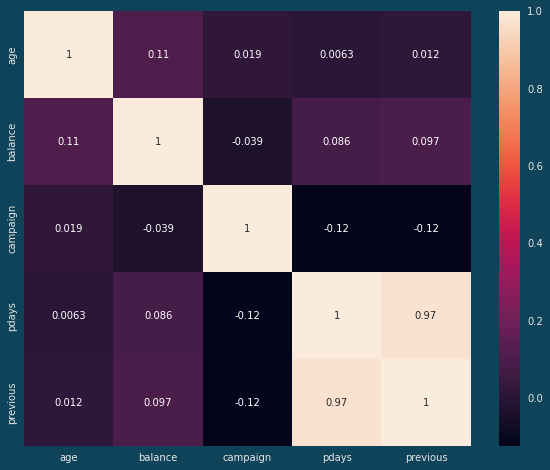

In [912]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman'),annot=True)

#### previous and pdays have high correlation, thus we will remove pday

In [913]:
df.drop(columns='pdays',axis=1,inplace=True)


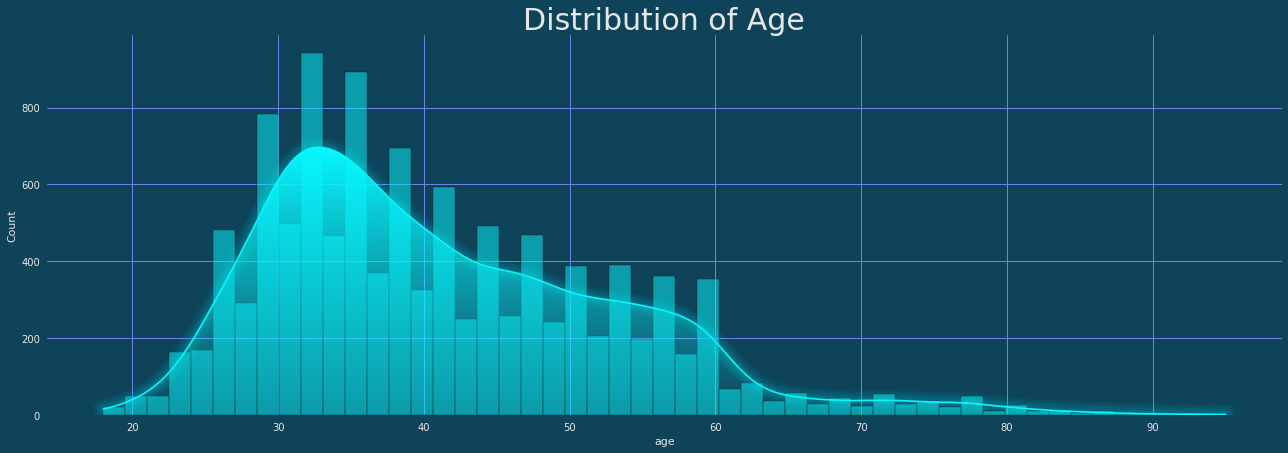

In [914]:
sns.displot(df,x="age",height=6,aspect=3,kde=True)
plt.title("Distribution of Age",fontdict={"fontsize":30})
Tommy.add_gradient_fill(alpha_gradientglow=1.0)
Tommy.make_lines_glow(n_glow_lines=20)

- #### Age is right skewed 

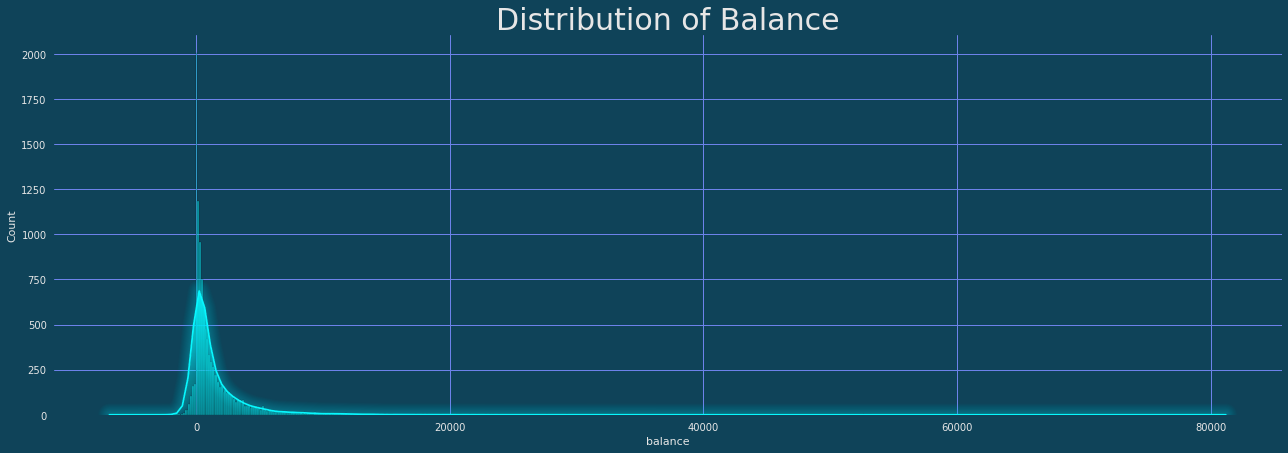

In [915]:
sns.displot(df,x="balance",height=6,aspect=3,kde=True)
plt.title("Distribution of Balance",fontdict={"fontsize":30});
Tommy.add_gradient_fill(alpha_gradientglow=0.9)
Tommy.make_lines_glow(n_glow_lines=20)

- #### Balance is really right skewed with 774 samples containing exactly 0 balance

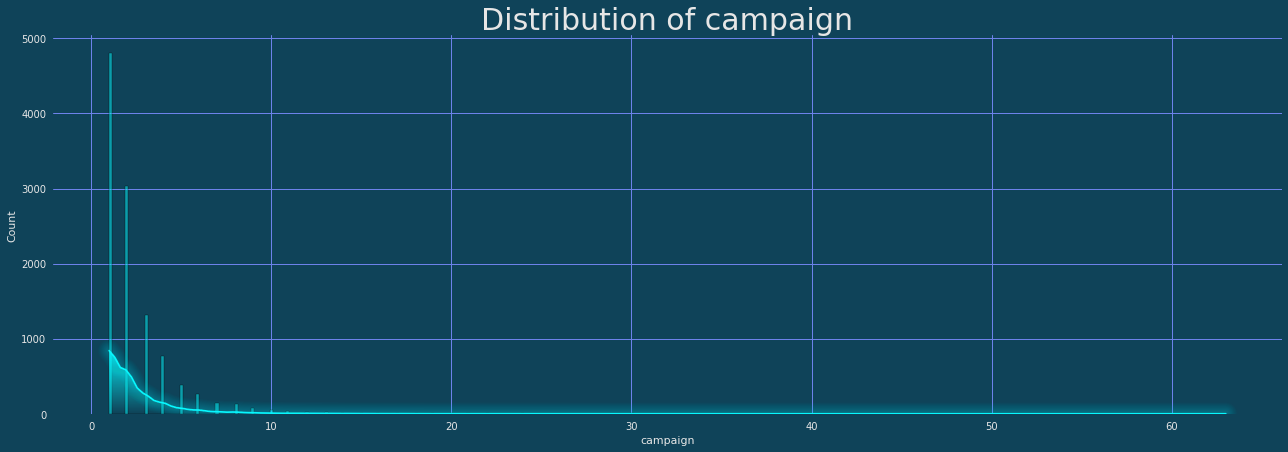

In [916]:
sns.displot(df,x="campaign",height=6,aspect=3,kde=True)
plt.title("Distribution of campaign",fontdict={"fontsize":30});
Tommy.add_gradient_fill(alpha_gradientglow=0.9)
Tommy.make_lines_glow(n_glow_lines=20)

In [917]:
px.histogram(df,x='deposit', template="plotly_dark",title="<b>Deposit Distribution")

- #### Marital Status are uniformly distributed

In [918]:
px.histogram(df,x='marital', template="plotly_dark",title="<b>Marital Status")

In [919]:
px.histogram(df,x='job', template="plotly_dark",title="<b>Job Distribution")


In [920]:
px.histogram(df,x='loan', template="plotly_dark",title="<b>Loan Distribution")

In [921]:
px.histogram(df,x='contact', template="plotly_dark",title="<b>Contact Distribution")


In [922]:
px.histogram(df,x='education', template="plotly_dark",title="<b>Education Distribution")

#### Duplicates

In [923]:
df.duplicated().sum()

8

In [924]:
df.drop_duplicates(inplace=True)

## Modeling

In [925]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'campaign', 'previous', 'poutcome', 'deposit'],
      dtype='object')

### Categorical Data

#### Nominal Data

In [926]:
df_mod=pd.get_dummies(df,columns=['job','marital','contact','poutcome'])


#### Ordinal Data

In [927]:
# df.education.value_counts()

In [928]:
df_mod.education=df_mod.education.map(
                                {"unknown":0,
                                 'primary':1,
                                 'secondary':2,
                                 'tertiary':3}
                            )

df_mod.housing=df_mod.housing.map({"yes":1,'no':0})
df_mod.deposit=df_mod.deposit.map({"yes":1,'no':0})
df_mod.loan=df_mod.loan.map({"yes":1,'no':0})



In [929]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11154 entries, 0 to 11161
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                11154 non-null  int64
 1   education          11154 non-null  int64
 2   balance            11154 non-null  int64
 3   housing            11154 non-null  int64
 4   loan               11154 non-null  int64
 5   campaign           11154 non-null  int64
 6   previous           11154 non-null  int64
 7   deposit            11154 non-null  int64
 8   job_admin.         11154 non-null  uint8
 9   job_blue-collar    11154 non-null  uint8
 10  job_entrepreneur   11154 non-null  uint8
 11  job_housemaid      11154 non-null  uint8
 12  job_management     11154 non-null  uint8
 13  job_retired        11154 non-null  uint8
 14  job_self-employed  11154 non-null  uint8
 15  job_services       11154 non-null  uint8
 16  job_student        11154 non-null  uint8
 17  job_technici

In [930]:
from pycaret.clustering import *

setup(df_mod,imputation_type=None,transformation=True,normalize=True)

,Description,Value
0,Session id,2227
1,Original data shape,"(11154, 30)"
2,Transformed data shape,"(11154, 30)"
3,Numeric features,30
4,Preprocess,1
5,Imputation type,None
6,Transformation,1
7,Transformation method,yeo-johnson
8,Normalize,1
9,Normalize method,zscore


In [931]:
kmeans=create_model('kmeans',num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1035,1062.7244,2.7750,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [932]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [933]:
results=assign_model(kmeans)
df['Cluster']=results.Cluster


In [934]:
# df['Cluster']=df.Cluster.map({"Cluster 1": "Cluster 0",
#                               "Cluster 0": "Cluster 1",
#                               "Cluster 2": "Cluster 2"})

In [935]:
df.groupby('Cluster').describe().T


Cluster            Cluster 0     Cluster 1     Cluster 2
age      count   5429.000000   2836.000000   2889.000000
         mean      40.422730     41.783498     42.230530
         std       11.442632     12.981102     11.580868
         min       18.000000     18.000000     19.000000
         25%       32.000000     32.000000     34.000000
         50%       38.000000     38.000000     40.000000
         75%       48.000000     50.000000     50.000000
         max       92.000000     93.000000     95.000000
balance  count   5429.000000   2836.000000   2889.000000
         mean    1472.289372   1783.248237   1388.317411
         std     3100.526340   3693.522506   2940.975715
         min    -6847.000000  -1137.000000  -2049.000000
         25%       95.000000    219.000000     97.000000
         50%      507.000000    722.000000    486.000000
         75%     1619.000000   2060.250000   1521.000000
         max    66653.000000  81204.000000  56831.000000
campaign count   5429.000000   2836.000000   2889.000000
         mean       2.648370      1.895628      2.850121
         std        2.778939      1.317780      3.448177
         min        1.000000      1.000000      1.000000
         25%        1.000000      1.000000      1.000000
         50%        2.000000      1.000000      2.000000
         75%        3.000000      2.000000      3.000000
         max       43.000000     12.000000     63.000000
previous count   5429.000000   2836.000000   2889.000000
         mean       0.000553      3.275740      0.000000
         std        0.030345      3.560134      0.000000
         min        0.000000      1.000000      0.000000
         25%        0.000000      1.000000      0.000000
         50%        0.000000      2.000000      0.000000
         75%        0.000000      4.000000      0.000000
         max        2.000000     58.000000      0.000000

In [936]:
for feature in df.columns:
    try:
        display(df.groupby('Cluster')[feature].apply(lambda cluster: cluster.mean()))
        print('mean\n-----------------------------')
    except:
        display(df.groupby('Cluster')[feature].apply(lambda cluster: cluster.mode()))
        print('mode\n-----------------------------')
        

Cluster
Cluster 0    40.422730
Cluster 1    41.783498
Cluster 2    42.230530
Name: age, dtype: float64

mean
-----------------------------


Cluster     
Cluster 0  0     management
Cluster 1  0     management
Cluster 2  0    blue-collar
Name: job, dtype: object

mode
-----------------------------


Cluster     
Cluster 0  0    married
Cluster 1  0    married
Cluster 2  0    married
Name: marital, dtype: object

mode
-----------------------------


Cluster     
Cluster 0  0    secondary
Cluster 1  0    secondary
Cluster 2  0    secondary
Name: education, dtype: object

mode
-----------------------------


Cluster
Cluster 0    1472.289372
Cluster 1    1783.248237
Cluster 2    1388.317411
Name: balance, dtype: float64

mean
-----------------------------


Cluster     
Cluster 0  0     no
Cluster 1  0     no
Cluster 2  0    yes
Name: housing, dtype: object

mode
-----------------------------


Cluster     
Cluster 0  0    no
Cluster 1  0    no
Cluster 2  0    no
Name: loan, dtype: object

mode
-----------------------------


Cluster     
Cluster 0  0    cellular
Cluster 1  0    cellular
Cluster 2  0     unknown
Name: contact, dtype: object

mode
-----------------------------


Cluster
Cluster 0    2.648370
Cluster 1    1.895628
Cluster 2    2.850121
Name: campaign, dtype: float64

mean
-----------------------------


Cluster
Cluster 0    0.000553
Cluster 1    3.275740
Cluster 2    0.000000
Name: previous, dtype: float64

mean
-----------------------------


Cluster     
Cluster 0  0    unknown
Cluster 1  0    failure
Cluster 2  0    unknown
Name: poutcome, dtype: object

mode
-----------------------------


Cluster     
Cluster 0  0     no
Cluster 1  0    yes
Cluster 2  0     no
Name: deposit, dtype: object

mode
-----------------------------


Cluster     
Cluster 0  0    Cluster 0
Cluster 1  0    Cluster 1
Cluster 2  0    Cluster 2
Name: Cluster, dtype: object

mode
-----------------------------


## Deep Diving

#### Before Diving into each Cluster seperatly, lets compare them with each other.

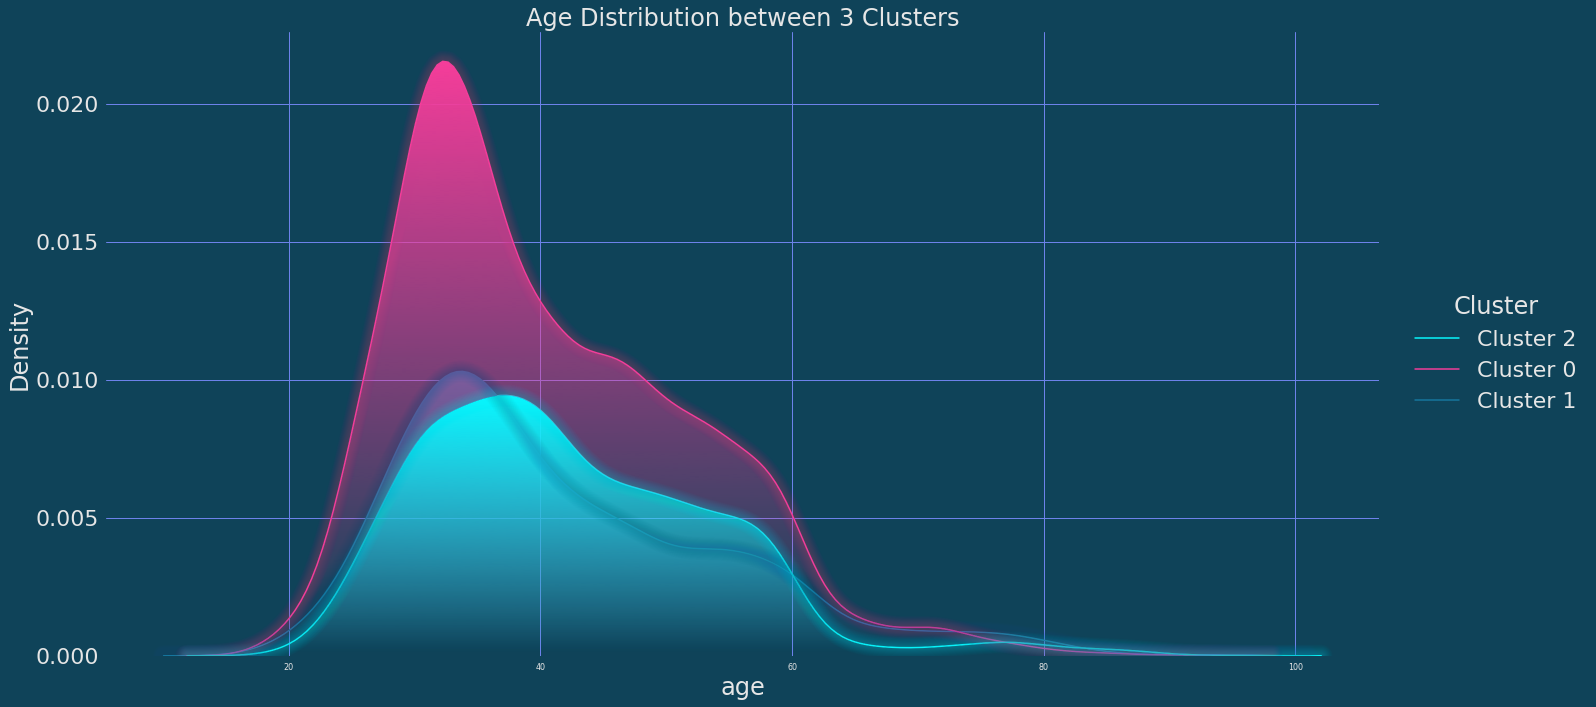

In [1137]:
plt.style.use(r'D:\python projects\Machine Learning Projects\Viz\Tommy\data\tommy.mplstyle')
ax=sns.displot(data=df,x='age',hue='Cluster',kind='kde',aspect=2,height=10).set(title="Age Distribution between 3 Clusters")
Tommy.add_gradient_fill(alpha_gradientglow=1.0)
Tommy.make_lines_glow(n_glow_lines=20)

#### Part divided by whole

In [978]:
def Ratio(cluster,feature,ratio=[],label=[]):
    unique_values=df[df["Cluster"]==cluster][feature].unique()
    for value in unique_values:
        print(value)
        label.append(value)
        print(df[(df["Cluster"]==cluster) & (df[feature]==value)].count()[0]/df[(df[feature]==value)].count()[0])
        ratio.append(df[(df["Cluster"]==cluster) & (df[feature]==value)].count()[0]/df[(df[feature]==value)].count()[0])

In [938]:
display(df.groupby('Cluster')['job'].value_counts())

Cluster    job          
Cluster 0  management       1375
           technician        964
           blue-collar       800
           admin.            609
           services          447
           retired           337
           self-employed     196
           unemployed        182
           student           178
           entrepreneur      173
           housemaid         136
           unknown            32
Cluster 1  management        726
           technician        446
           admin.            389
           blue-collar       371
           retired           244
           services          197
           student           143
           self-employed      98
           unemployed         98
           entrepreneur       53
           housemaid          52
           unknown            19
Cluster 2  blue-collar       771
           management        463
           technician        411
           admin.            335
           services          279
           retired

#### Cluster 0

blue-collar
0.411946446961895
technician
0.5293794618341571
services
0.48429035752979416
entrepreneur
0.5274390243902439
self-employed
0.4839506172839506
unemployed
0.5098039215686274
admin.
0.4568642160540135
management
0.5362714508580343
student
0.4958217270194986
retired
0.43316195372750643
housemaid
0.49635036496350365
unknown
0.45714285714285713


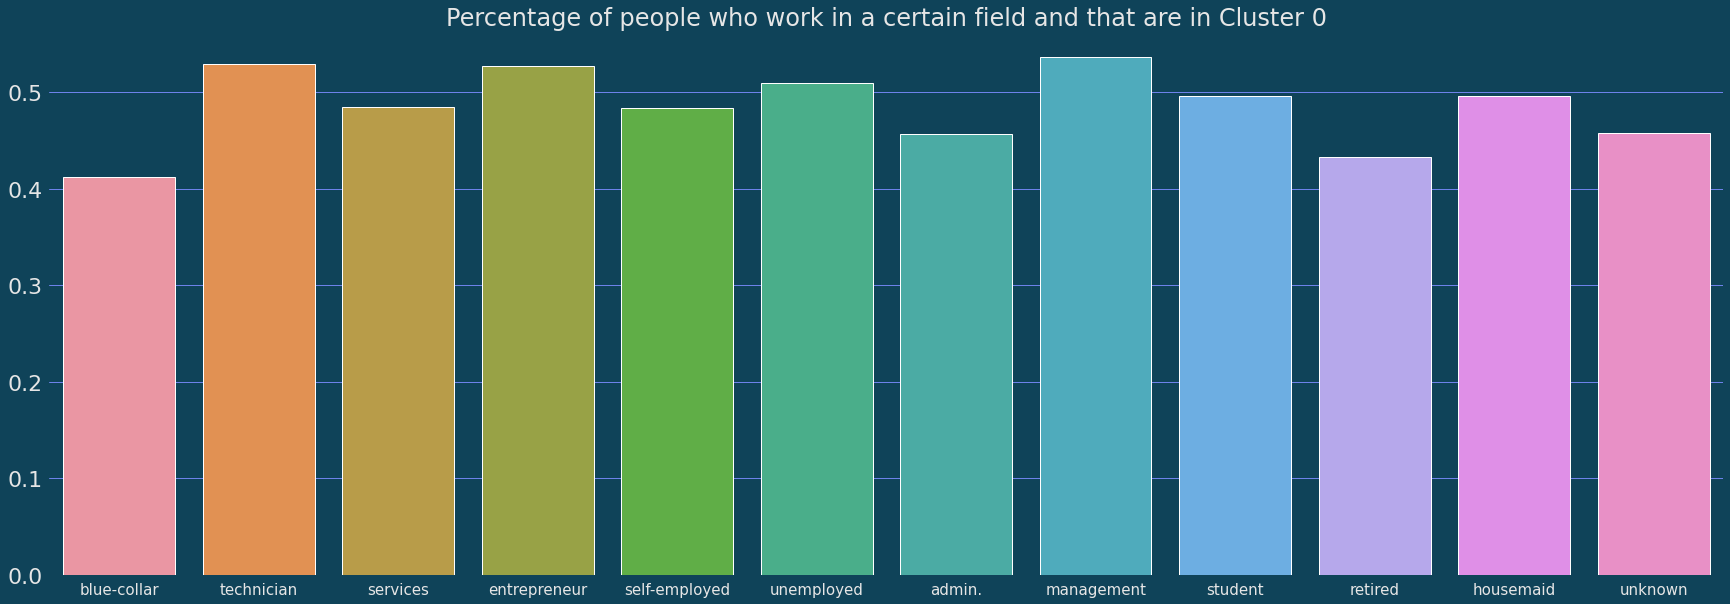

In [1133]:
ratio,label=[],[]
Ratio('Cluster 0','job',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who work in a certain field and that are in Cluster 0");

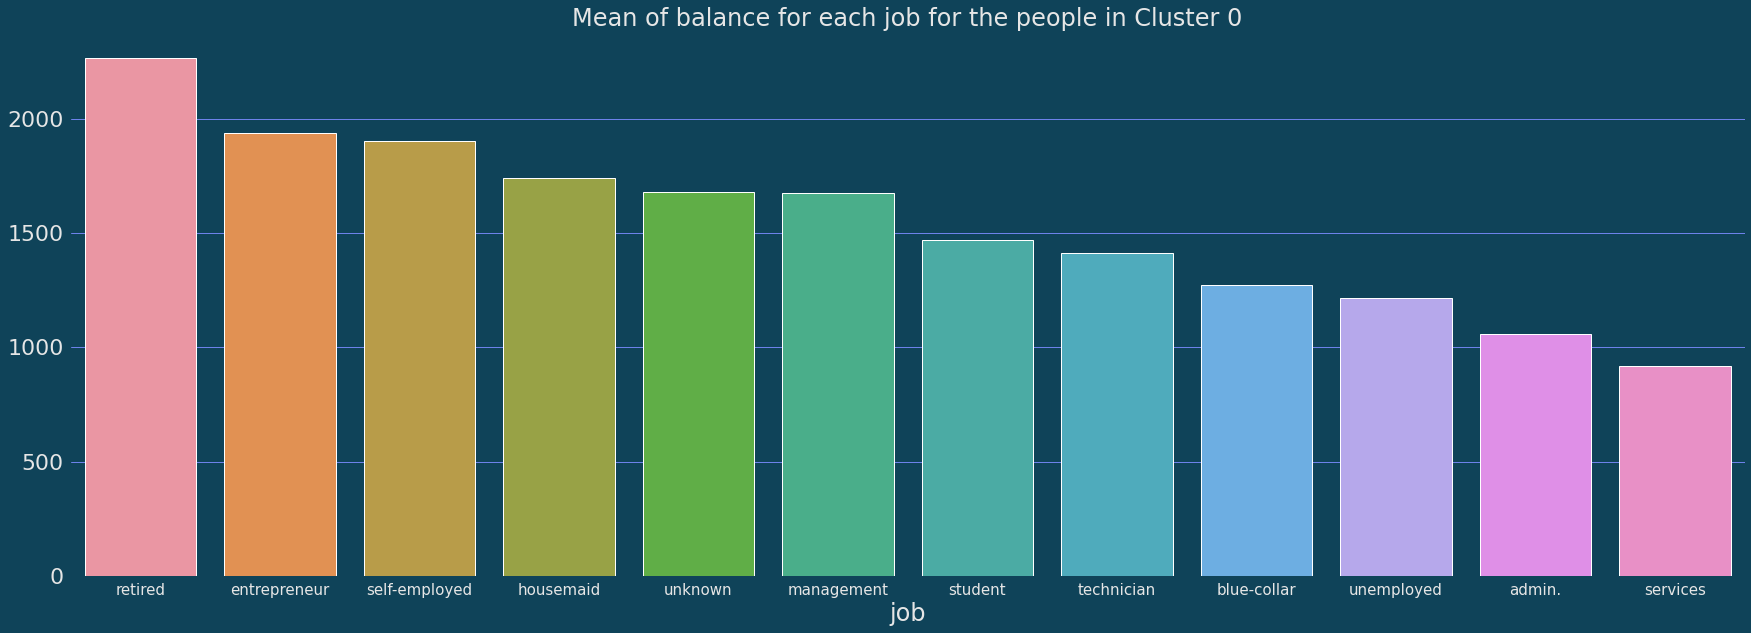

In [1134]:
Cluster1=df.groupby(["Cluster"]).get_group("Cluster 0")
values=Cluster1.groupby('job')['balance'].apply(lambda x: x.mean()).sort_values(ascending=False).values
labels=Cluster1.groupby('job')['balance'].apply(lambda x: x.mean()).sort_values(ascending=False).index

plt.figure(figsize=(30,10))
ax=sns.barplot(x=labels,y=values)
ax.set_xticklabels( labels,rotation=0, fontsize=15);
ax.set_title("Mean of balance for each job for the people in Cluster 0");


single
0.5099601593625498
married
0.4703009295730266
divorced
0.5042536736272235


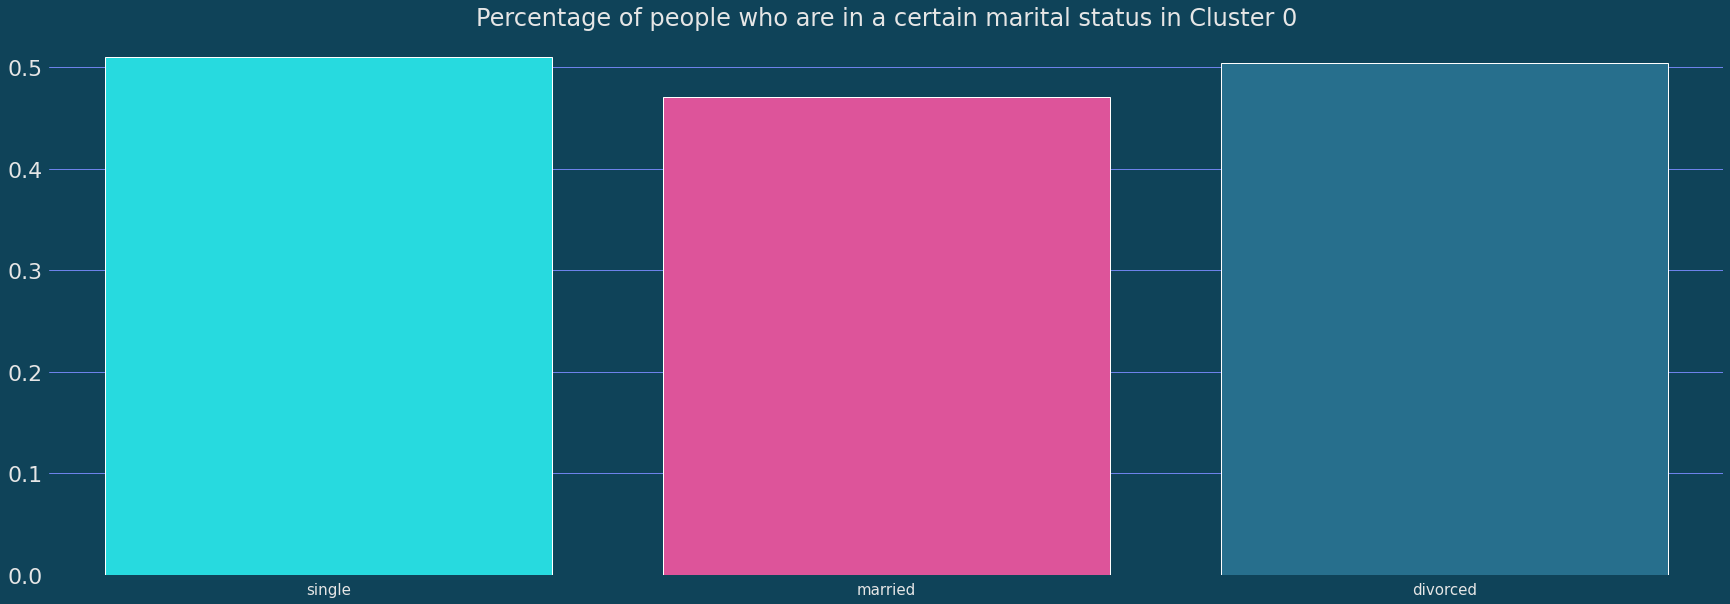

In [1094]:
ratio,label=[],[]
Ratio('Cluster 0','marital',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who are in a certain marital status in Cluster 0");

secondary
0.47487666727571715
primary
0.4229486324216144
tertiary
0.5379815518176886
unknown
0.42943548387096775


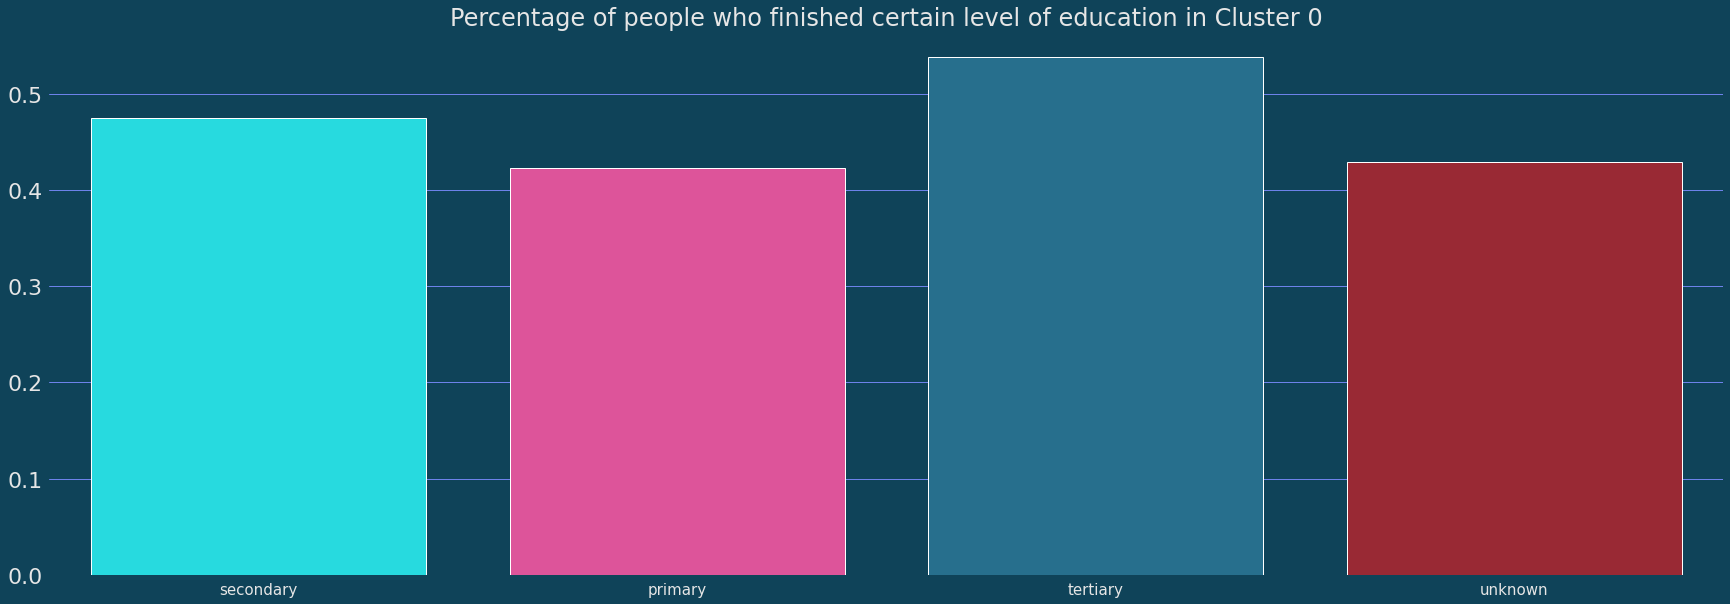

In [1095]:
ratio,label=[],[]
Ratio('Cluster 0','education',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who finished certain level of education in Cluster 0");

yes
0.4050776809397499
no
0.560074880871341


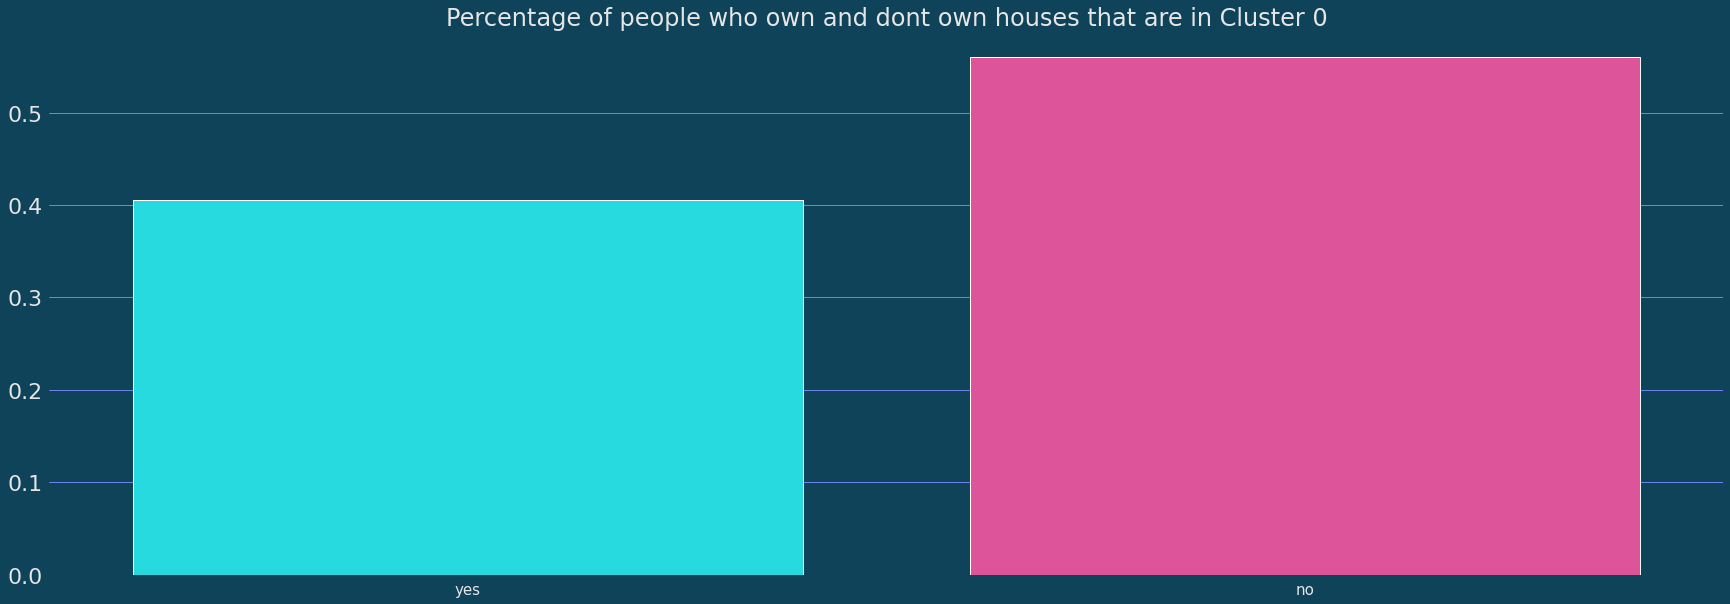

In [1098]:
ratio,label=[],[]
Ratio('Cluster 0','housing',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who own and dont own houses that are in Cluster 0");

no
0.47792448937487103
yes
0.5452054794520548


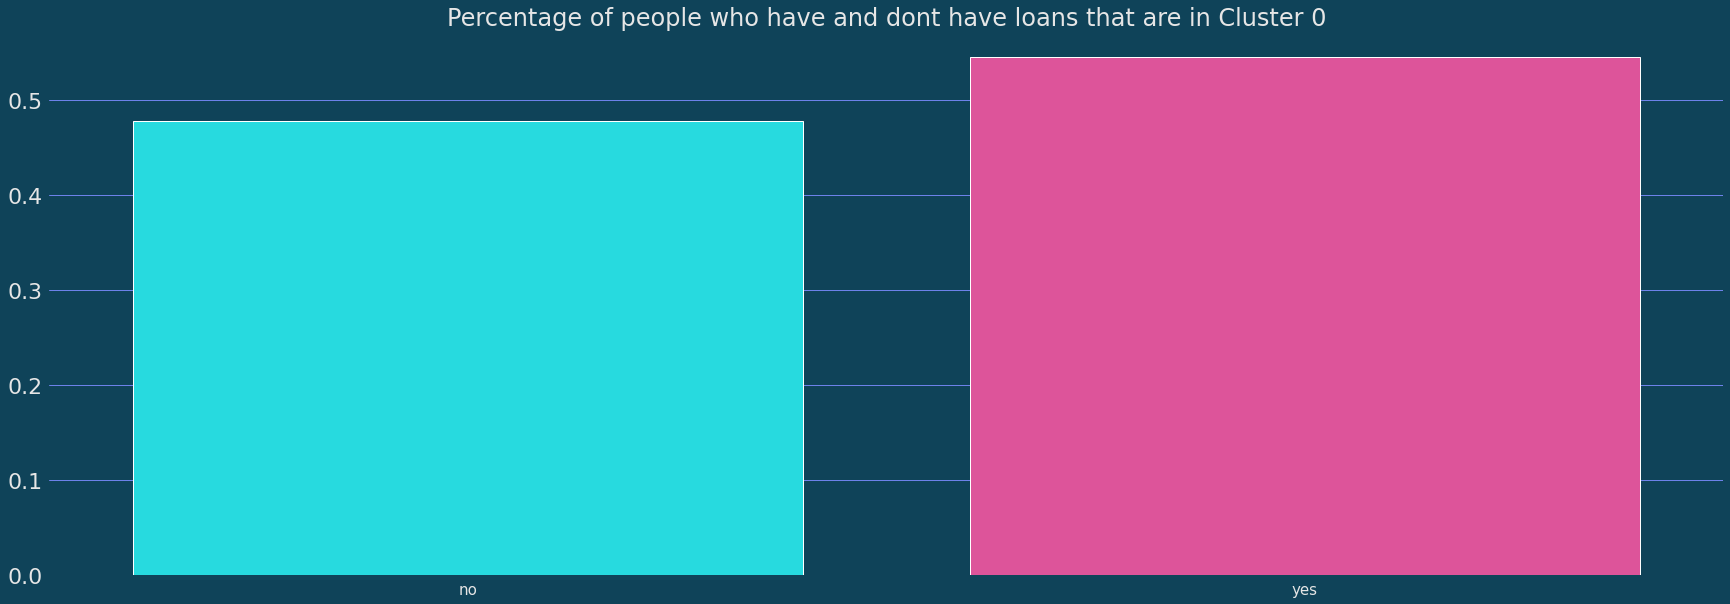

In [1130]:
ratio,label=[],[]
Ratio('Cluster 0','loan',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who have and dont have loans that are in Cluster 0");

cellular
0.6755848680935789


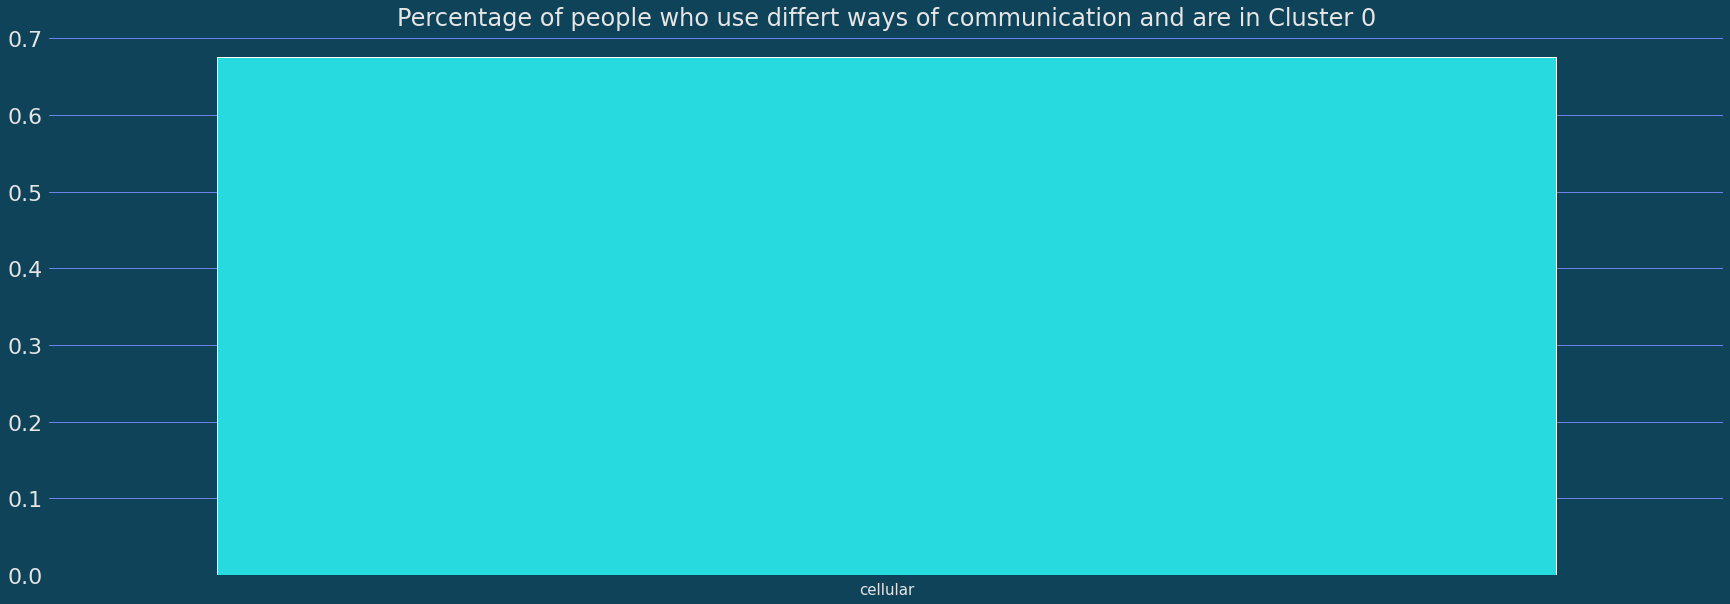

In [1102]:
ratio,label=[],[]
Ratio('Cluster 0','contact',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who use differt ways of communication and are in Cluster 0");

yes
0.49441816461684013
no
0.47980916680865565


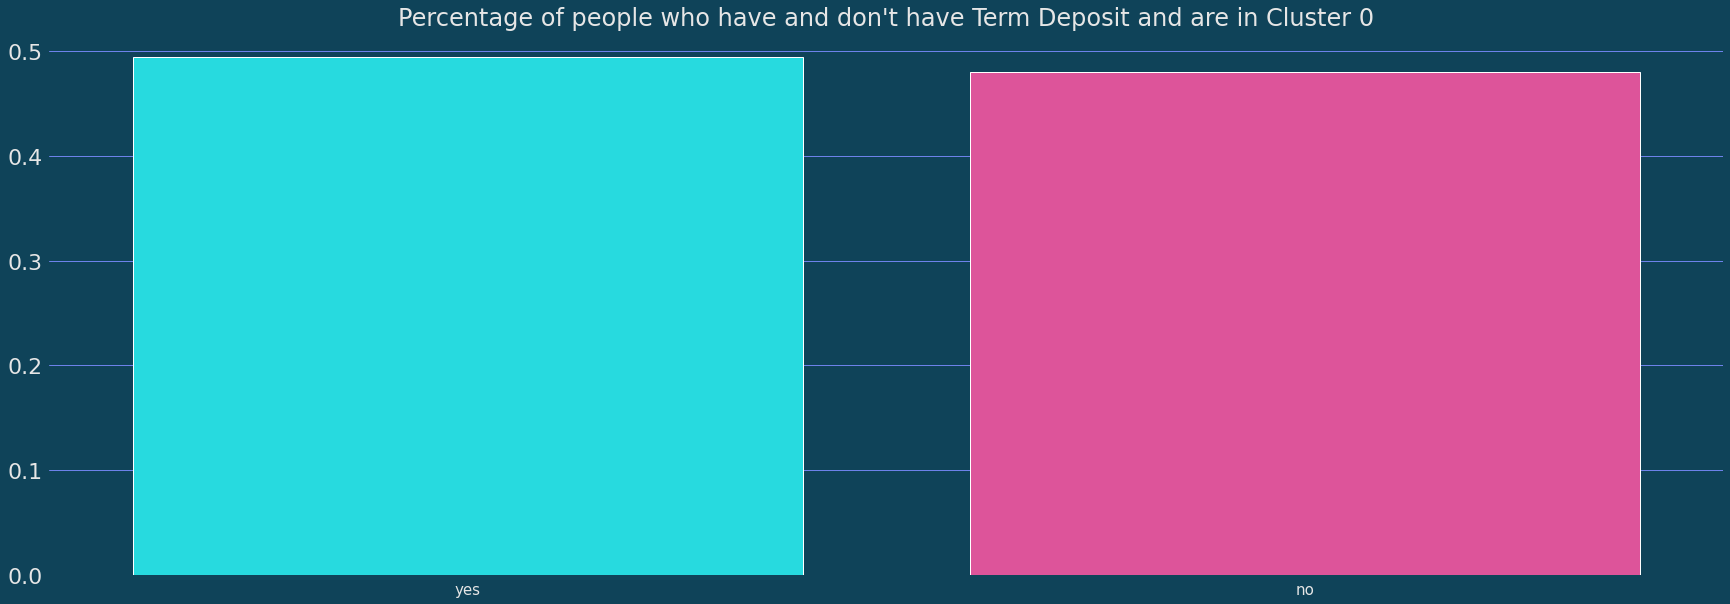

In [1103]:
ratio,label=[],[]
Ratio('Cluster 0','deposit',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who have and don't have Term Deposit and are in Cluster 0");

#### Cluster 1

admin.
0.29182295573893474
services
0.2134344528710726
technician
0.24492037342119716
retired
0.31362467866323906
entrepreneur
0.16158536585365854
management
0.2831513260530421
unemployed
0.27450980392156865
blue-collar
0.1910401647785788
unknown
0.2714285714285714
self-employed
0.2419753086419753
housemaid
0.1897810218978102
student
0.3983286908077994


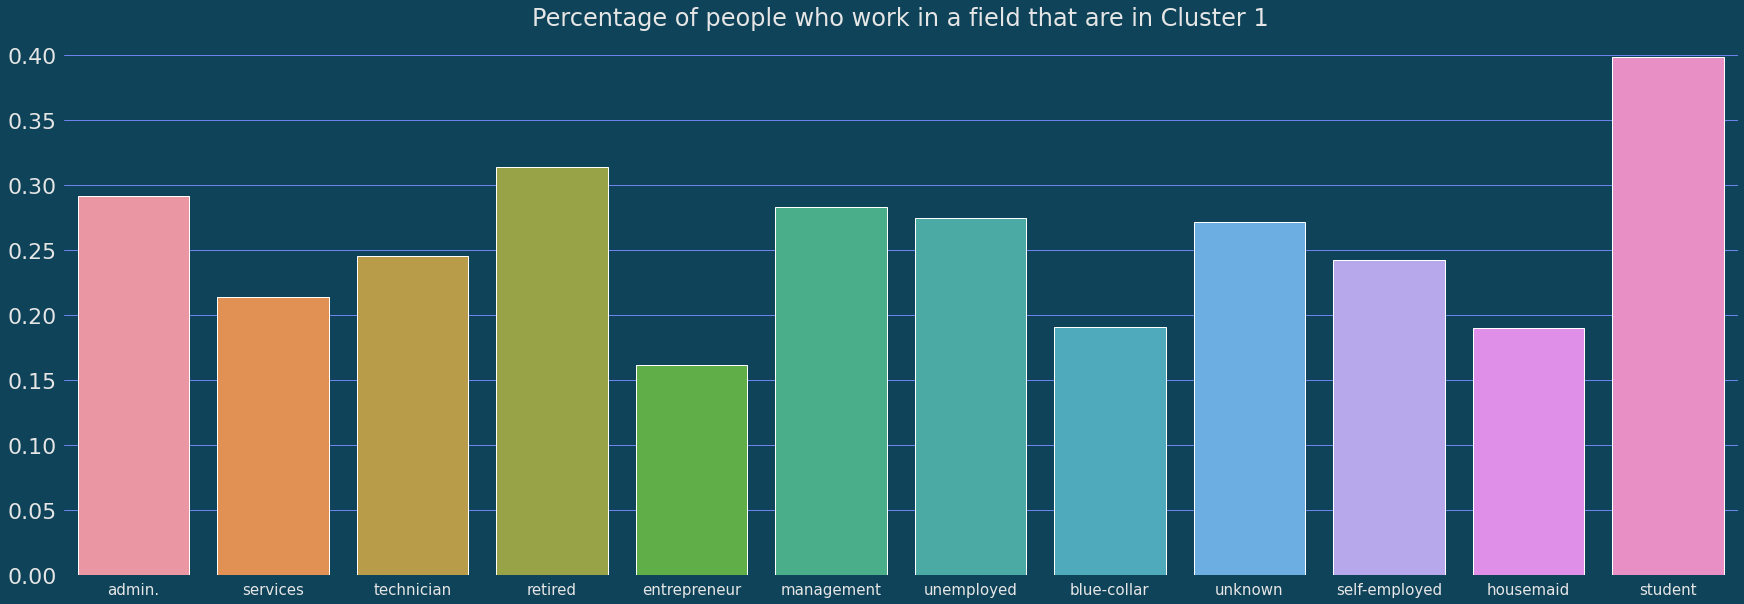

In [1087]:
ratio,label=[],[]
Ratio('Cluster 1','job',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who work in a field that are in Cluster 1");

single
0.2794536141149687
married
0.2489365054356389
divorced
0.21191028615622584


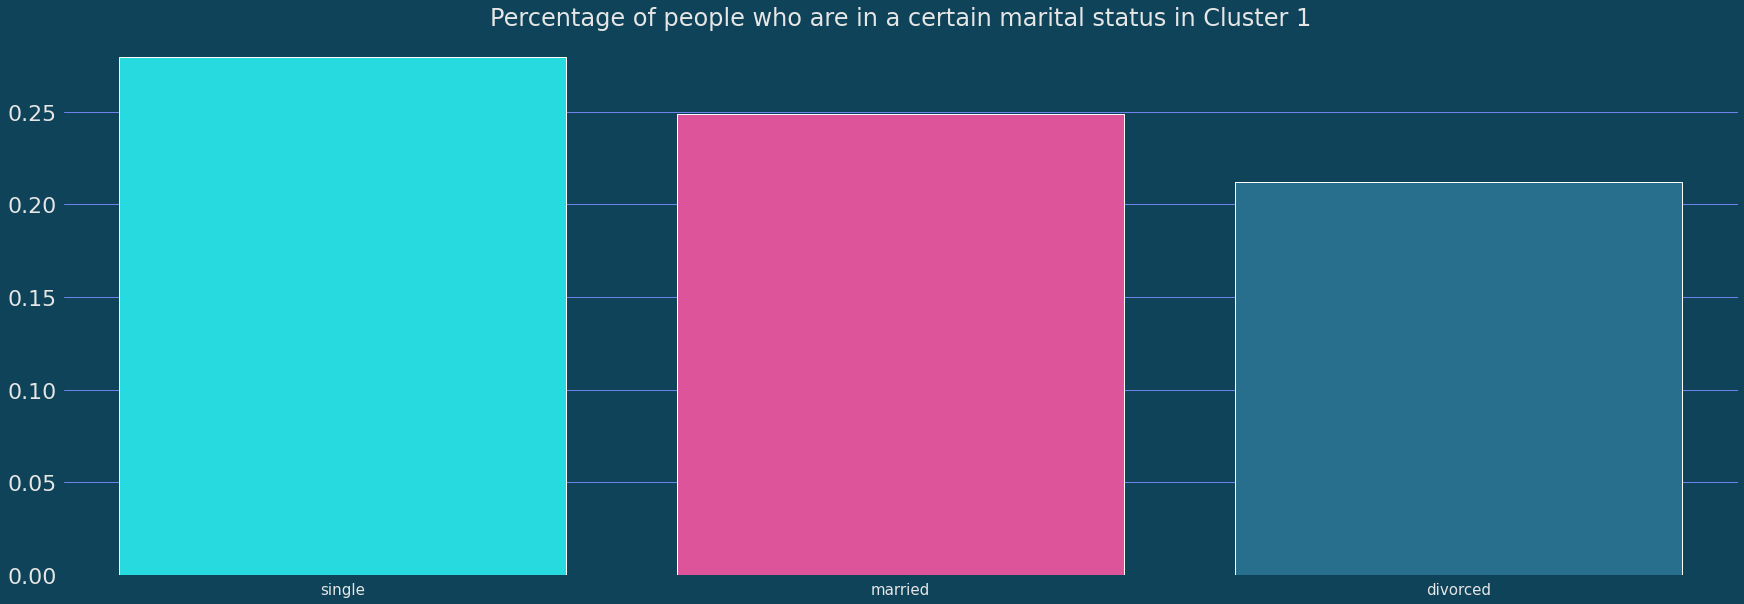

In [1104]:
ratio,label=[],[]
Ratio('Cluster 1','marital',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who are in a certain marital status in Cluster 1");

secondary
0.24867531518362873
tertiary
0.28865979381443296
primary
0.1867911941294196
unknown
0.26411290322580644


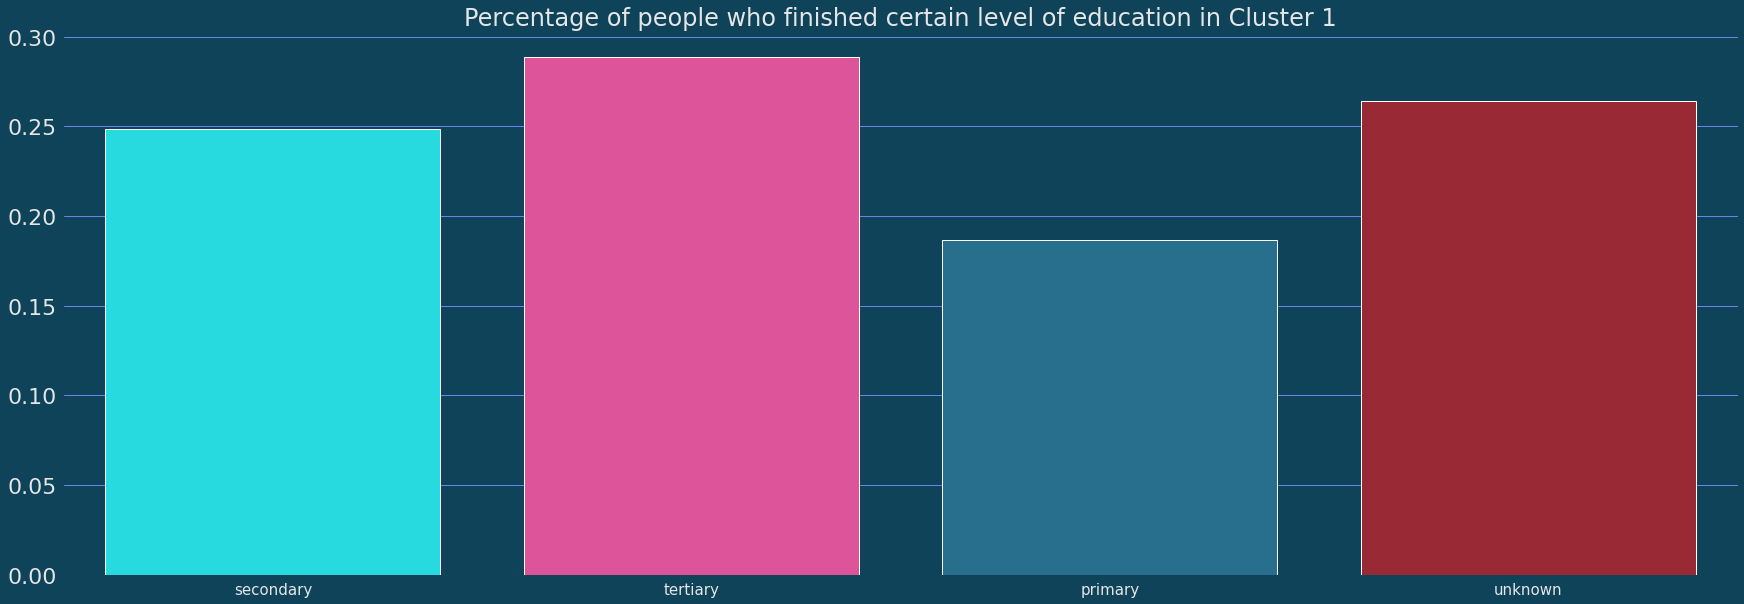

In [1105]:
ratio,label=[],[]
Ratio('Cluster 1','education',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who finished certain level of education in Cluster 1");

yes
0.24308450170519136
no
0.2642954390742001


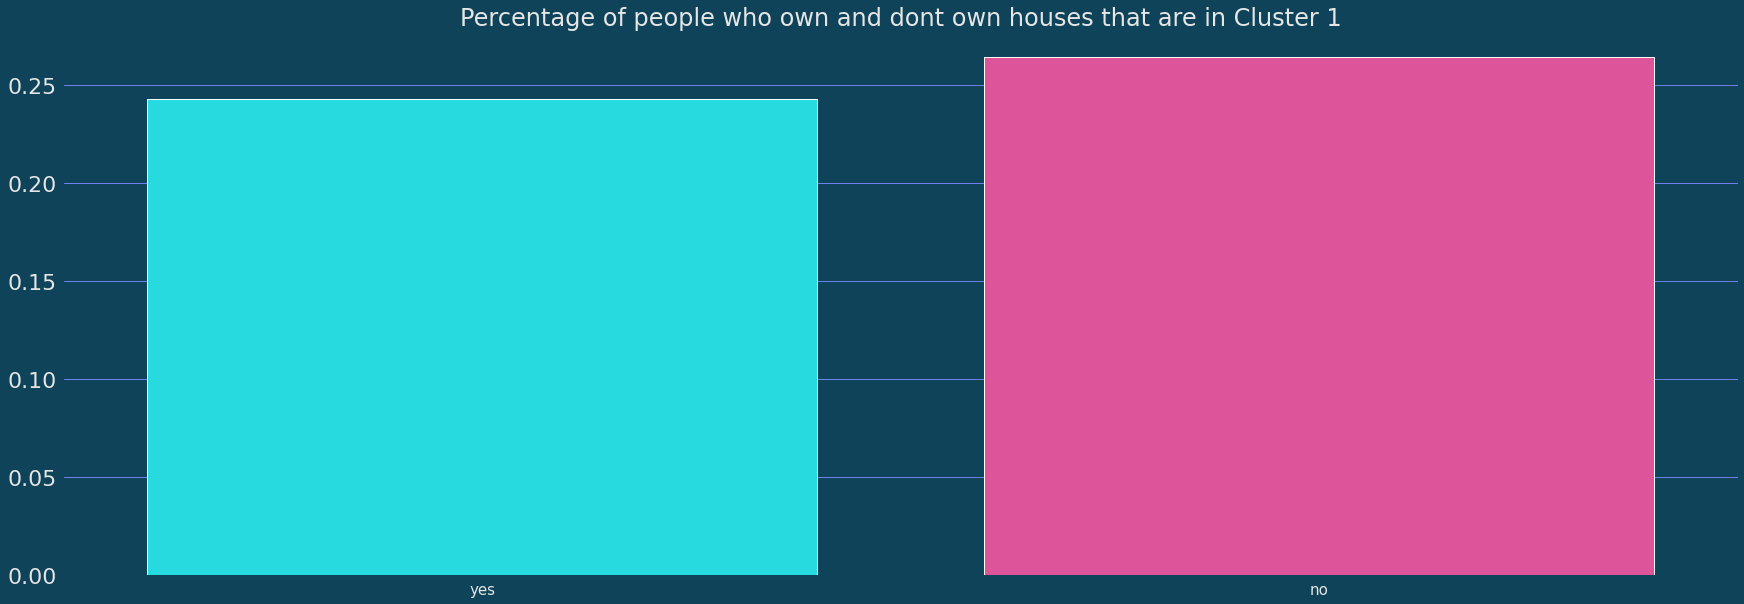

In [1106]:
ratio,label=[],[]
Ratio('Cluster 1','housing',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who own and dont own houses that are in Cluster 1");

yes
0.18698630136986302
no
0.2643903445430163


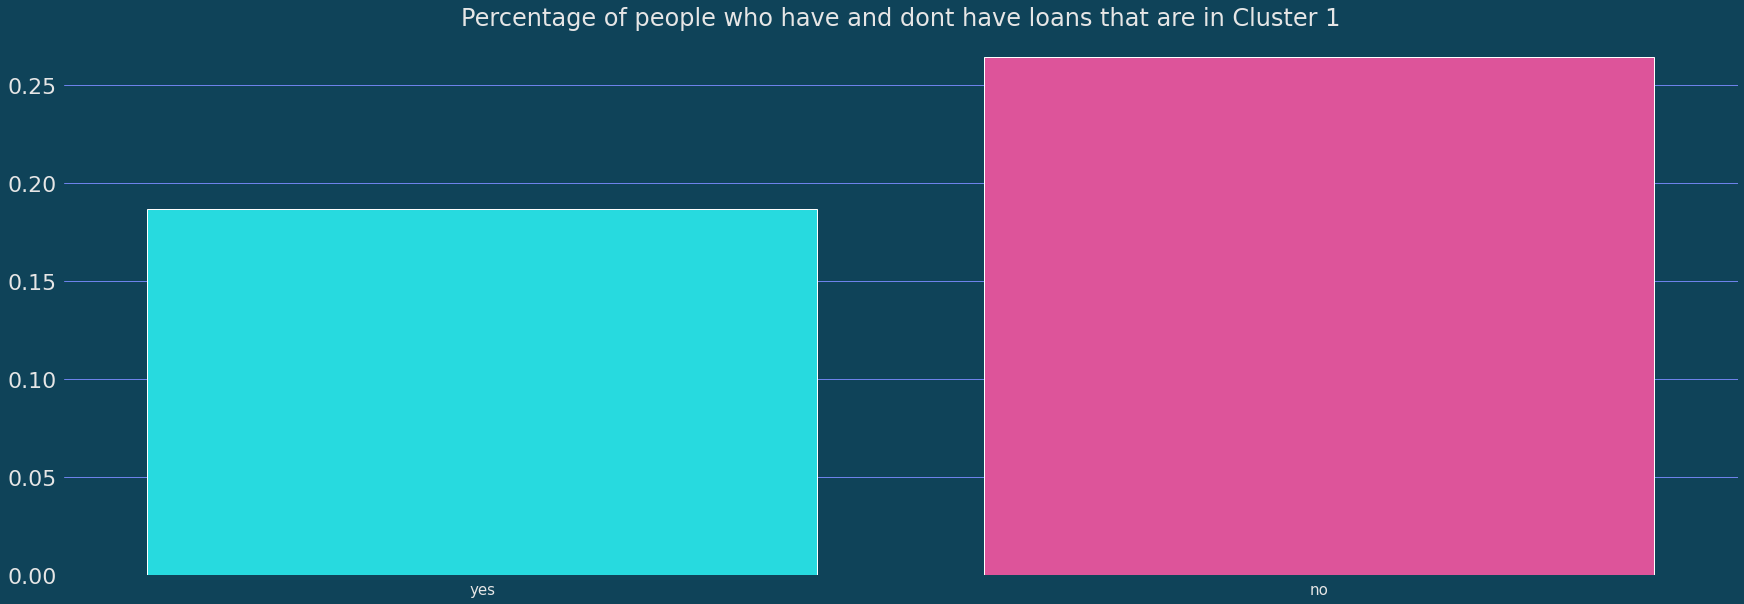

In [1107]:
ratio,label=[],[]
Ratio('Cluster 1','loan',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who have and dont have loans that are in Cluster 1");

telephone
0.2713178294573643
unknown
0.008105802047781569
cellular
0.32441513190642113


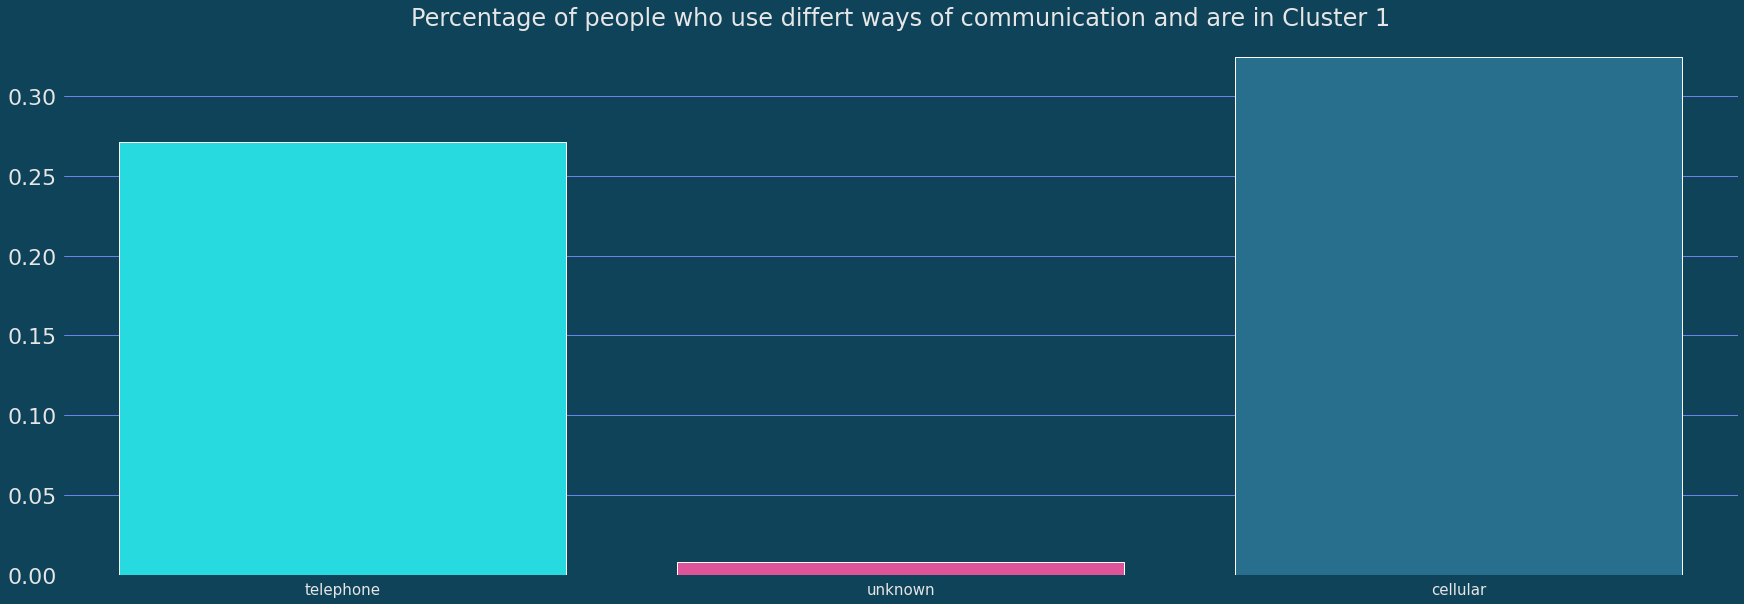

In [1108]:
ratio,label=[],[]
Ratio('Cluster 1','contact',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who use differt ways of communication and are in Cluster 1");

yes
0.3600756859035005
no
0.1589708638609644


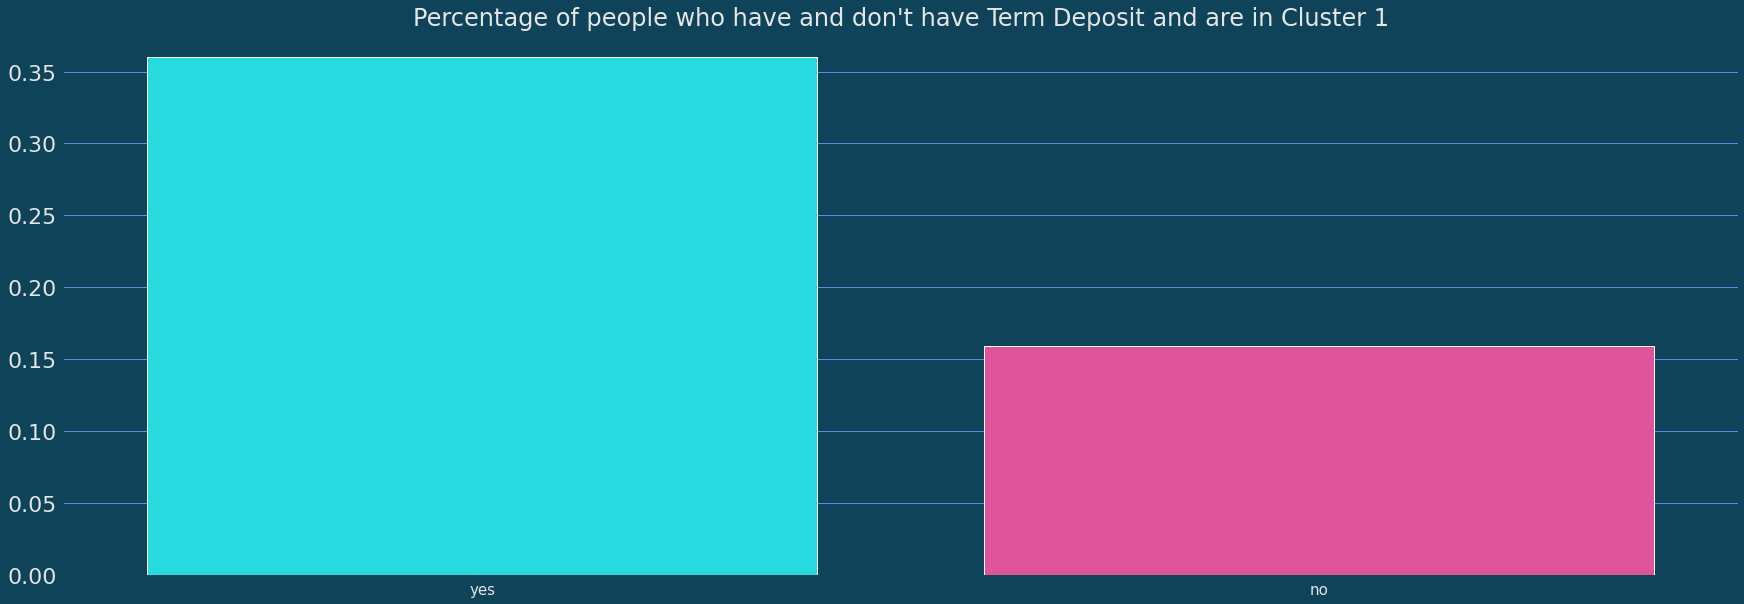

In [1109]:
ratio,label=[],[]
Ratio('Cluster 1','deposit',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who have and don't have Term Deposit and are in Cluster 1");

### Cluster 2

admin.
0.25131282820705175
technician
0.2257001647446458
services
0.30227518959913324
management
0.18057722308892354
retired
0.2532133676092545
blue-collar
0.39701338825952626
unemployed
0.21568627450980393
entrepreneur
0.31097560975609756
housemaid
0.31386861313868614
unknown
0.2714285714285714
self-employed
0.2740740740740741
student
0.10584958217270195


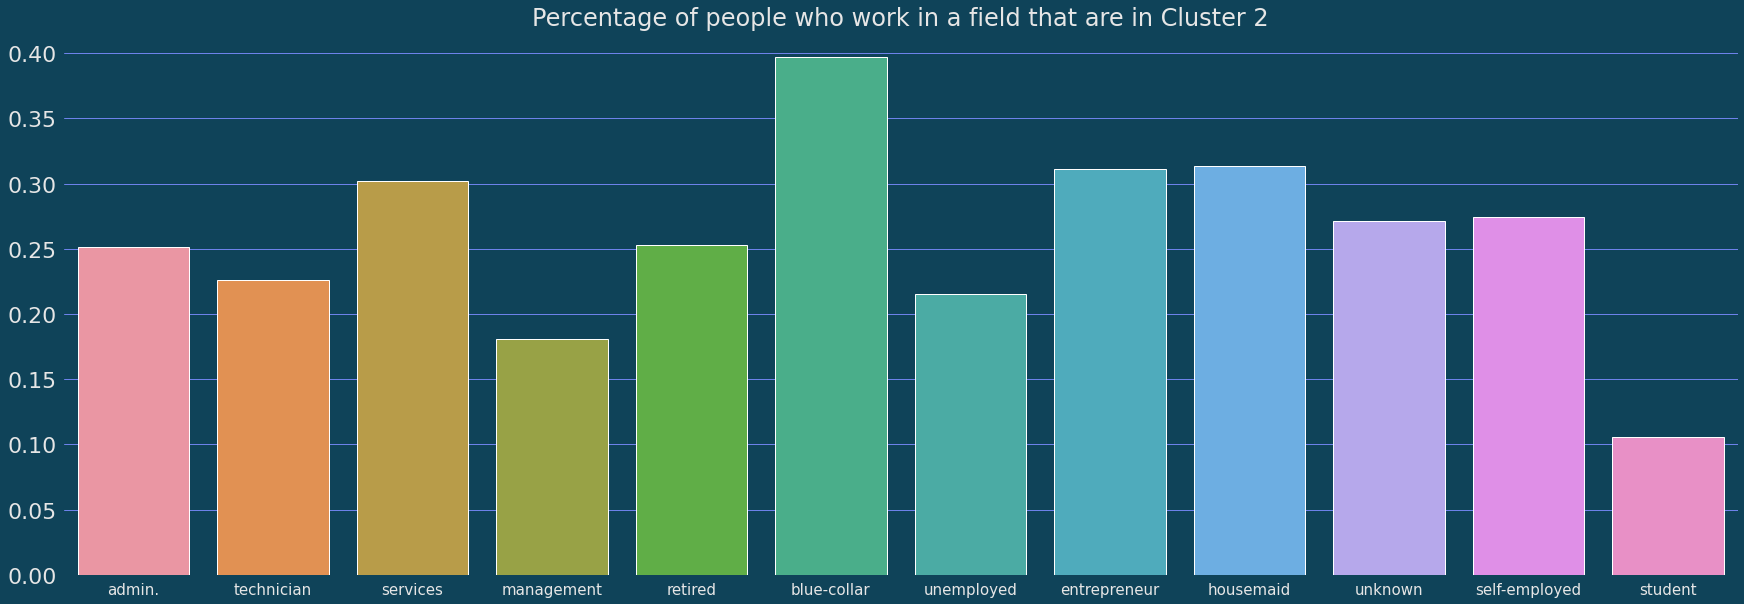

In [1077]:
ratio,label=[],[]
Ratio('Cluster 2','job',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
plt.style.use(r'D:\python projects\Machine Learning Projects\Viz\Tommy\data\tommy.mplstyle')
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who work in a field that are in Cluster 2");

married
0.2807625649913345
single
0.2105862265224815
divorced
0.2838360402165507


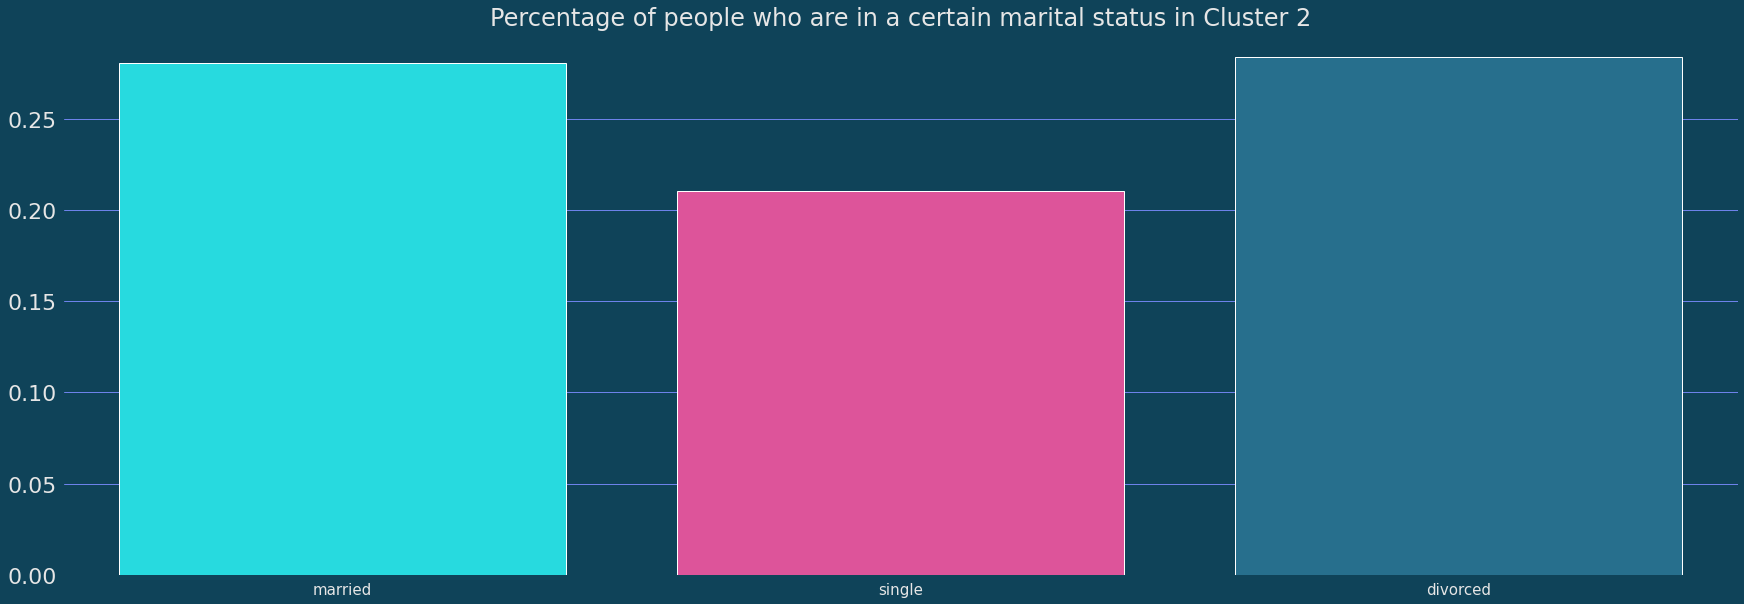

In [1067]:
ratio,label=[],[]
Ratio('Cluster 2','marital',ratio,label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who are in a certain marital status in Cluster 2");

secondary
0.2764480175406541
tertiary
0.17335865436787845
primary
0.39026017344896596
unknown
0.3064516129032258


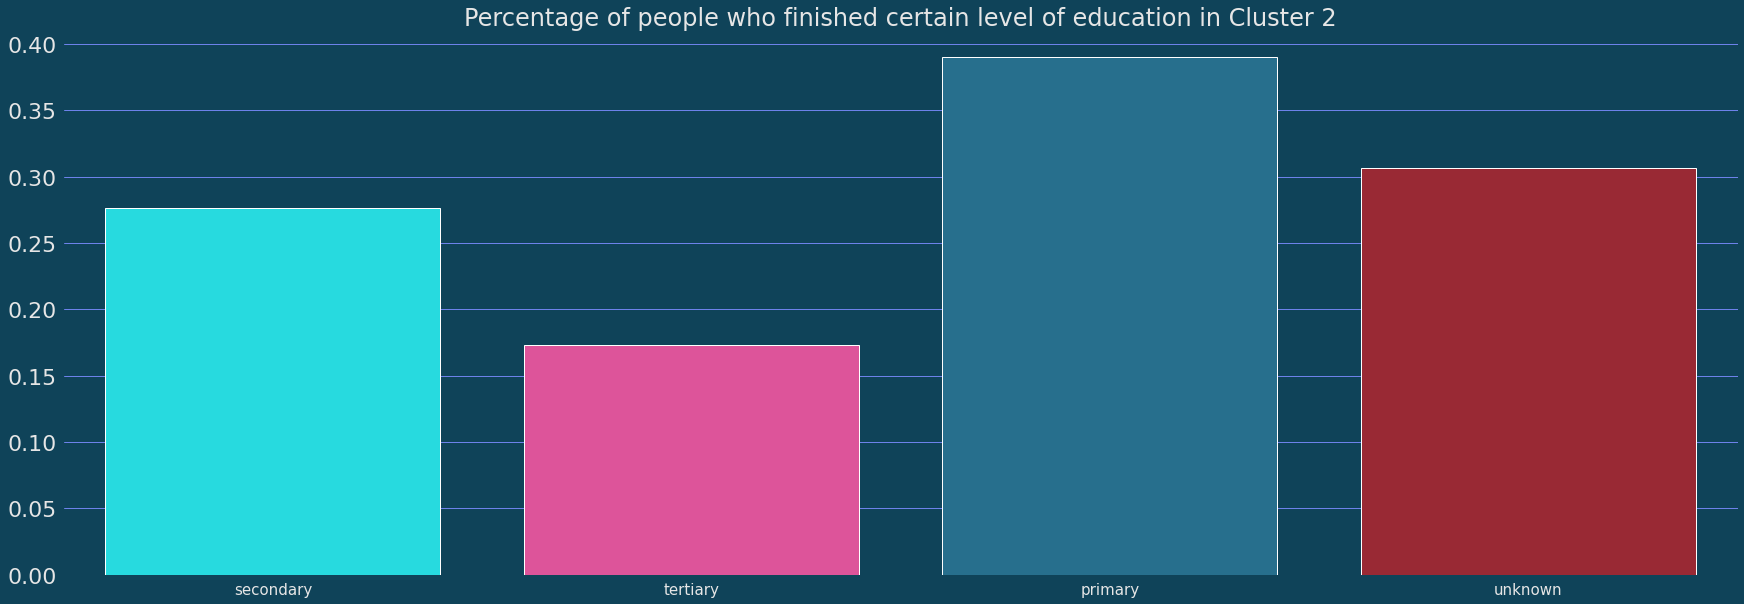

In [1066]:
ratio,label=[],[]
Ratio('Cluster 2','education',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who finished certain level of education in Cluster 2");


yes
0.35183781735505876
no
0.1756296800544588


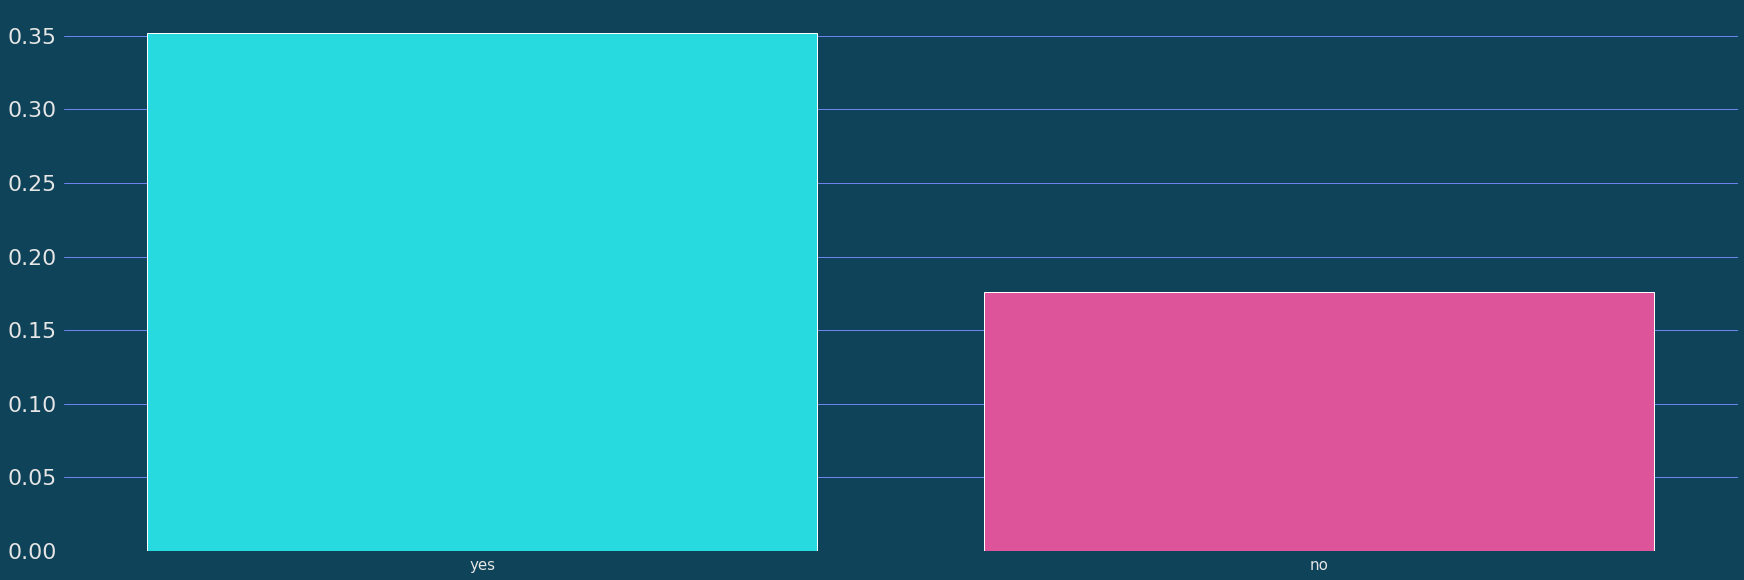

In [1061]:
ratio,label=[],[]
Ratio('Cluster 2','housing',ratio,label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who own and dont own houses that are in Cluster 2");

no
0.25768516608211267
yes
0.2678082191780822


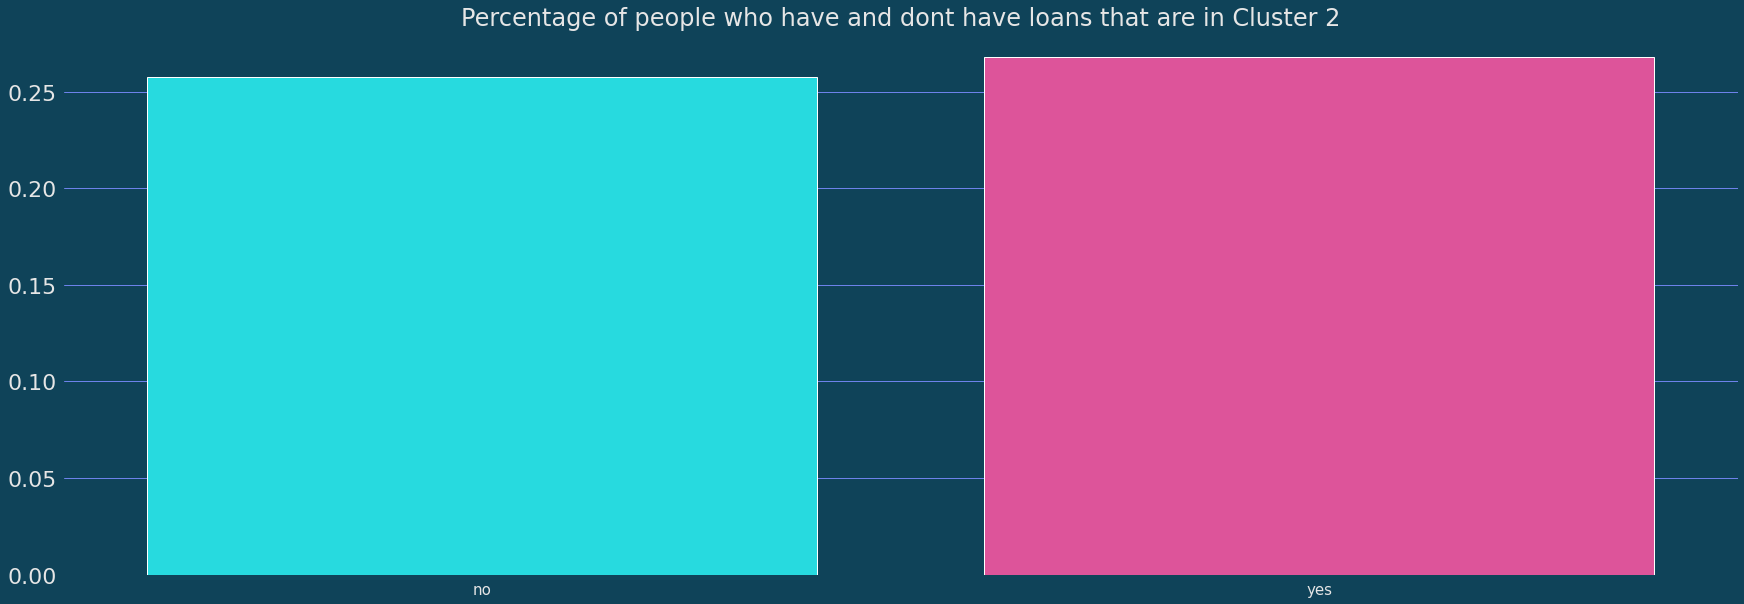

In [1065]:
ratio,label=[],[]
Ratio('Cluster 2','loan',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15)
ax.set_title("Percentage of people who have and dont have loans that are in Cluster 2");

unknown
0.9918941979522184
telephone
0.7286821705426356


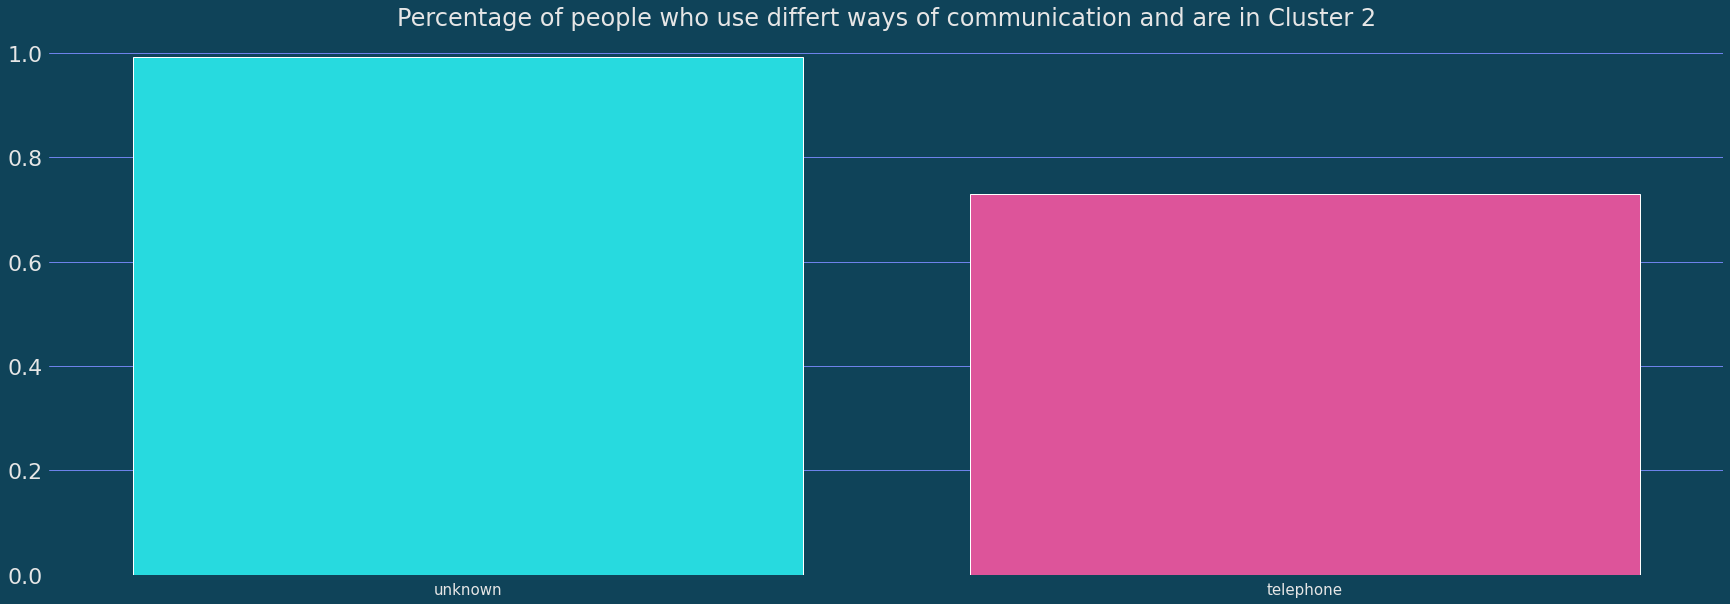

In [1101]:
ratio,label=[],[]
Ratio('Cluster 2','contact',ratio=ratio,label=label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15)
ax.set_title("Percentage of people who use differt ways of communication and are in Cluster 2");

In [961]:
ratio,label=[],[]
Ratio('Cluster 2','deposit',ratio,label)
plt.figure(figsize=(30,10))
ax=sns.barplot(x=label,y=ratio)
ax.set_xticklabels( label,rotation=0, fontsize=15);
ax.set_title("Percentage of people who have and don't have Term Deposit and are in Cluster 2");

yes
0.14550614947965942
no
0.36121996933038


## Insights

###### Before we begin, please remember that the data is baised and not uniformly dstributed across all features

#### Number of People in Cluster:
-   #### Cluster 0: 5429
-   #### Cluster 1: 2889
-   #### Cluster 2: 2836

# Cluster 0


### Age
- #### Is the youngest, with a mean of 40 years old and a mode of 31 and median of 38


### Job
- #### Most of the cluster work in:
    -    #####  Management
    -    #####  Technician
    -    #####  Blue-Collar

- #### However:
    -    #####  Only 53.6% of Managers are in Cluster 0
    -    #####  Only 52.9% of Technician are in Cluster 0
    -    #####  52.7% of Entrepreneurs are in Cluster 0
    -    #####  Even though Blue-Collar was third most, it has the lowest percentage with 41%
    -    #####  50% of Students are in Cluster 0


### Marital Status

- #### Most of the cluster are married but the ratio of marital status in cluster 0 are:
    -   ##### Single: 51%
    -   ##### Divorced: 50%
    -   ##### Married: 47%

### Education

- #### Most of the cluster have finished secondary but the ratio of education in cluster 0 are:
    -   ##### 53.7% of people who finished tertiary are in Cluster 0
    -   ##### 47.8% of people who finished secondary are in Cluster 0
    -   ##### 42.2% of people who finished primary are in Cluster 0


### Balance
- #### Cluster 0 is ranked second most in balance

- #### Highest Earning Jobs in Cluster 0:

    -   #### Retired:          2267.554896 (AVG)
    -   #### Entrepreneur:     1940.086705 (AVG)
    -   #### Self-Employed:    1904.188776 (AVG)

### Housing
- #### Most people in cluster 0 do not own a house and 56% of people who do not own a house are in cluster 0

### Loan
- #### Most people in cluster 0 are not in debt (loan), but only 47% of people who have no loans are in cluster 0 & 54.5% of people of have loans are in cluster 0

### Contact
- #### There is not a single sample that uses telephone as a main source of communication in cluster 0, only cellular. This also supports the statement of them being the youngest cluster.
- #### However, Cluster 0 only represents 67% of people using cellular in this dataset, meaning there are 33% remaining distributed among both the other two clusters.

### Deposit
- #### Most people in cluster 0 have not opened a Term Deposit but 49% of people who have opened are in cluster 0

# Cluster 2


### Age
- #### Is the oldest, with a mean of 42 years old and a mode of 36 and median of 40


### Job
- #### Most of the cluster work in:
    -    #####  Blue-Collar
    -    #####  Management
    -    #####  Technician


- #### This time the ratios support the numbers wth:
    -    #####  39% of Blue-Collars are in Cluster 2
    -    #####  But only 18% of Managers are in Cluster 2
    -    #####  Again only 22.5% of Technicians are in Cluster 2
    -    #####  With jobs such as housemaids, retired, and entrepreneurs have more percentages

### Marital Status

- #### Agan due to the imbalance, most of the cluster are married but the ratio of marital status in cluster 2 agree with:
    -   ##### Maried: 28%
    -   ##### Divorced: 28%
    -   ##### Single: 21%

- #### Supporting the fact that this is indeed the oldest group

### Education

- #### Most of the cluster have finished secondary but the ratio of education in cluster 2 are:

    -   ##### 39% of people who finished primary are in Cluster 2
    -   ##### 27.6% of people who finished secondary are in Cluster 2
    -   ##### Only 17.3% of people who finished tertiary are in Cluster 2


### Balance
- #### Surprisingly, Cluster 2 is ranked last in balance, even though they are the oldest.

- #### Highest Earning Jobs in Cluster 2:

    -   #### Unknown:       2960.947368 (AVG)
    -   #### Retired:       1939.685279 (AVG)
    -   #### Management:    1703.384449 (AVG)
- #### This shows that as there are very high earning jobs, there are some really low earning jobs in cluster 2 as they are the lowest cluster in terms of balance

#### - Education & Balance insights shows us that this group due to not finishing education may not have financial awareness and not be able to finance his/her money

### Housing
- #### Cluster 2 is the only cluster to have most of its people own a house but it only contains 35% of people who own a house

### Loan
- #### Most people in cluster 2 are not in debt (loan)

### Contact
- #### There is not a single sample that uses cellular as a main source of communication in cluster 2, only telephone. This also supports the statement of them being the oldest cluster.

### Deposit
- #### Most people in cluster 2 have not opened a Term Deposit.

# Cluster 1


### Age
- #### Is the middle group regarding to Age, with a mean of 41 years old and a mode of 33 and median of 38


### Job
- #### Most of the cluster work in:
    -    #####  Management
    -    #####  Technician
    -    #####  Admin


- #### This time the ratios support the numbers wth:
    -    #####  28% of Managers are in Cluster 1
    -    #####  25% of Technician are in Cluster 1
    -    #####  29% of Admins are in Cluster 1
    -    #####  40% of Students are in Cluster 1 Surprisingly

- #### This shows how that cluster 1 has some characteristics from Cluster 1 and some from Cluster 0

### Marital Status

- #### Agan due to the imbalance, most of the cluster are married but the ratio of marital status in cluster 1 agree with:
    -   ##### Single: 28%
    -   ##### Maried: 25%
    -   ##### Divorced: 21%

### Education

- #### Most of the cluster have finished secondary but the ratio of education in cluster 1 are:

    -   ##### 29% of people who finished tertiary are in Cluster 1
    -   ##### 25% of people who finished secondary are in Cluster 1
    -   ##### Only 18.6% of people who finished primary are in Cluster 1

### Balance
- #### Because Cluster 1 takes the best in both worlds, it leads in Balance.

- #### Highest Earning Jobs in Cluster 1:

    -   #### Retired:       3009.577869 (AVG)
    -   #### Self-Employed: 2681.387755 (AVG)
    -   #### Management:    2074.106061 (AVG)


### Housing
- #### Most people in Cluster 1 do not own a house
### Loan
- #### Most people in cluster 1 are not in debt (loan) and it has the lowest percentages of people that are with only 18%

### Contact
- #### Both Cellular and Telephone are used by the people in this cluster.

### Deposit
- #### Cluster 1 is the only cluster where most of its people actually have a Term Deposit